# Median filter. Anton Ryabtsev. DCAM MIPT.

The **Median Filter** is a nonlinear digital filtering technique, often used to remove noise from an image or signal.

[For wide view.](https://en.wikipedia.org/wiki/Median_filter)

In [2]:
%matplotlib inline
import scipy
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#### Downloading image.

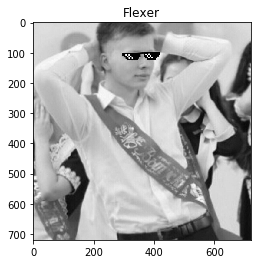

In [4]:
import imageio
im = imageio.imread('https://github.com/kosmo-tony/DCAM-MIPT-Homeworks/blob/master/Flexer.jpg?raw=true', 'jpg')
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
flexer = gray(im)

plt.imshow(flexer, cmap='gray')
plt.title('Flexer')
plt.show()

#### Adding some noise.

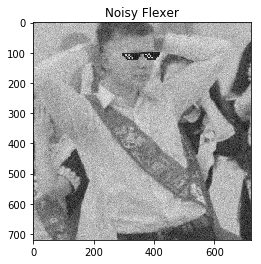

In [7]:
n = flexer.shape[1]

sigma = 20
noisy_flexer = (flexer + sigma*np.random.randn(n,n))

plt.imshow(noisy_flexer, cmap='gray')
plt.title('Noisy Flexer')
plt.show()

In [64]:
def median_filter(noisy_image, window_size):
    image_size = noisy_image.shape[0]
    edgex = window_size // 2
    edgey = edgex
    result = np.zeros((image_size, image_size))
    for x in range(edgex, image_size - edgex):
        for y in range(edgey, image_size - edgey):
            colorList = np.zeros((window_size, window_size))
            for i in range(window_size):
                for j in range(window_size):
                    colorList[i][j] = noisy_image[x + i - edgex][y + j - edgey]
            result[x][y] = np.sort(colorList.flatten()).mean()
    return result

Text(0.5,1,'Healthy FLEXER')

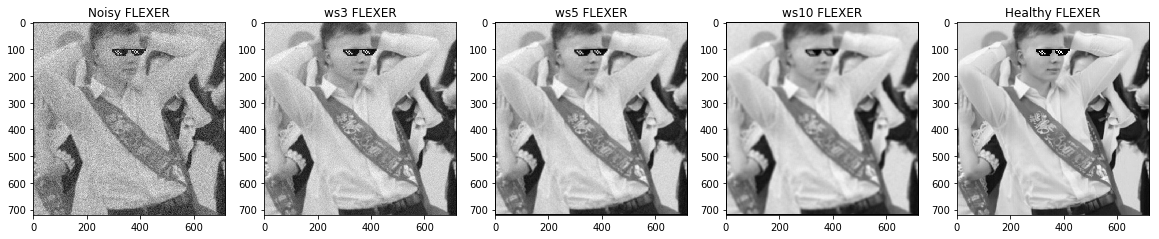

In [65]:
new_flexer_ws3 = median_filter(noisy_flexer, 3) # ws means window size
new_flexer_ws5 = median_filter(noisy_flexer, 5)
new_flexer_ws10 = median_filter(noisy_flexer, 10)

fig, axes = plt.subplots(1, 5, figsize=(20, 20))

axes[0].imshow(noisy_flexer, cmap='gray')
axes[0].set_title('Noisy FLEXER')
axes[1].imshow(new_flexer_ws3, cmap='gray')
axes[1].set_title('ws3 FLEXER')
axes[2].imshow(new_flexer_ws5, cmap='gray')
axes[2].set_title('ws5 FLEXER')
axes[3].imshow(new_flexer_ws10, cmap='gray')
axes[3].set_title('ws10 FLEXER')
axes[4].imshow(flexer, cmap='gray')
axes[4].set_title('Healthy FLEXER')

#### Conclusion.

Window size equal to ten gives too blurred image, equal to three -- not enough clear. The number five is optimal.